[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds4v/absa-vlsp-2018/blob/main/experiments/Hotel-v1.ipynb)

In [1]:
!pip install -q emoji
!pip install -q vncorenlp
!pip install -q datasets
!pip install -q accelerate
!pip install -q transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 37.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 require

In [2]:
!git clone https://github.com/trunghieu41003/Big-data-project.git
!ls

Cloning into 'Big-data-project'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 49 (delta 10), reused 47 (delta 8), pack-reused 0
Receiving objects: 100% (49/49), 25.39 MiB | 13.23 MiB/s, done.
Resolving deltas: 100% (10/10), done.
Big-data-project  sample_data


In [3]:
import os
import shutil

# Kiểm tra cấu trúc thư mục hiện tại
print("Trước khi di chuyển:")
!ls /content

# Đường dẫn thư mục hiện tại
current_folder = "/content/Big-data-project"

# Đường dẫn đích đến
destination_folder = "/content"

# Lặp qua từng thư mục con trong thư mục hiện tại
for item in os.listdir(current_folder):
    # Tạo đường dẫn đầy đủ tới mỗi thư mục con
    current_path = os.path.join(current_folder, item)
    # Di chuyển thư mục con đến đích đến
    shutil.move(current_path, destination_folder)

# Kiểm tra lại cấu trúc thư mục sau khi di chuyển
print("\nSau khi di chuyển:")
!ls /content

Trước khi di chuyển:
Big-data-project  sample_data

Sau khi di chuyển:
acsa_model.py  Big-data-project  evaluators   helper.py  processors  sample_data
assests        datasets		 experiments  Paper.pdf  README.md


In [4]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
sys.path.append('..')
tf.__version__

'2.15.0'

# Constants Setup and Load the Data

In [5]:
TRAIN_PATH = 'datasets/vlsp2018_hotel/1-VLSP2018-SA-Hotel-train.csv'
VAL_PATH = 'datasets/vlsp2018_hotel/2-VLSP2018-SA-Hotel-dev.csv'
TEST_PATH = 'datasets/vlsp2018_hotel/3-VLSP2018-SA-Hotel-test.csv'
PRETRAINED_MODEL = 'vinai/phobert-base'
MODEL_NAME = 'Hotel-v1' # Multitask model on Hotel domain
MAX_LENGTH = 256
BATCH_SIZE = 25


In [ ]:
!pip uninstall pyarrow
!pip install pyarrow

In [6]:
from processors.vlsp2018_processor import VLSP2018Loader
raw_datasets = VLSP2018Loader.load(TRAIN_PATH, VAL_PATH, TEST_PATH)
raw_datasets

Generating train split: 0 examples [00:00, ? examples/s]

Generating val split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['Review', 'FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATURES', 'FACILITIES#GENERAL', 'FACILITIES#MISCELLANEOUS', 'FACILITIES#PRICES', 'FACILITIES#QUALITY', 'FOOD&DRINKS#MISCELLANEOUS', 'FOOD&DRINKS#PRICES', 'FOOD&DRINKS#QUALITY', 'FOOD&DRINKS#STYLE&OPTIONS', 'HOTEL#CLEANLINESS', 'HOTEL#COMFORT', 'HOTEL#DESIGN&FEATURES', 'HOTEL#GENERAL', 'HOTEL#MISCELLANEOUS', 'HOTEL#PRICES', 'HOTEL#QUALITY', 'LOCATION#GENERAL', 'ROOMS#CLEANLINESS', 'ROOMS#COMFORT', 'ROOMS#DESIGN&FEATURES', 'ROOMS#GENERAL', 'ROOMS#MISCELLANEOUS', 'ROOMS#PRICES', 'ROOMS#QUALITY', 'ROOM_AMENITIES#CLEANLINESS', 'ROOM_AMENITIES#COMFORT', 'ROOM_AMENITIES#DESIGN&FEATURES', 'ROOM_AMENITIES#GENERAL', 'ROOM_AMENITIES#MISCELLANEOUS', 'ROOM_AMENITIES#PRICES', 'ROOM_AMENITIES#QUALITY', 'SERVICE#GENERAL'],
        num_rows: 3000
    })
    val: Dataset({
        features: ['Review', 'FACILITIES#CLEANLINESS', 'FACILITIES#COMFORT', 'FACILITIES#DESIGN&FEATUR

# Preprocess and Tokenize the Data

In [7]:
from processors.vietnamese_processor import VietnameseTextPreprocessor

# You should be carefull when using single word replacement for acronyms, because it can cause misinterpretation.
# For example, 'giá': ['price', 'gia'] can replace the word 'gia' in 'gia đình', making it become 'giá đình'.
vn_preprocessor = VietnameseTextPreprocessor(vncorenlp_dir='../processors/VnCoreNLP', extra_teencodes={
    'khách sạn': ['ks'], 'nhà hàng': ['nhahang'], 'nhân viên': ['nv'],
    'cửa hàng': ['store', 'sop', 'shopE', 'shop'],
    'sản phẩm': ['sp', 'product'], 'hàng': ['hàg'],
    'giao hàng': ['ship', 'delivery', 'síp'], 'đặt hàng': ['order'],
    'chuẩn chính hãng': ['authentic', 'aut', 'auth'], 'hạn sử dụng': ['date', 'hsd'],
    'điện thoại': ['dt'],  'facebook': ['fb', 'face'],
    'nhắn tin': ['nt', 'ib'], 'trả lời': ['tl', 'trl', 'rep'],
    'feedback': ['fback', 'fedback'], 'sử dụng': ['sd'], 'xài': ['sài'],
}, max_correction_length=MAX_LENGTH)

VnCoreNLP word segmenter is loaded successfully.


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/961 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.17k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

dict.txt:   0%|          | 0.00/360k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/279 [00:00<?, ?B/s]

bmd1905/vietnamese-correction-v2 is loaded successfully.


In [8]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(PRETRAINED_MODEL)
tokens = tokenizer.encode('Tôi là sinh_viên trường đại_học Công_nghệ thông_tin .')
print('Encode:', tokens, '\nDecode:', tokenizer.decode(tokens))
tokenizer.model_input_names

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

Encode: [0, 218, 8, 649, 212, 956, 2413, 195, 5, 2] 
Decode: <s> Tôi là sinh_viên trường đại_học Công_nghệ thông_tin. </s>


['input_ids', 'token_type_ids', 'attention_mask']

In [ ]:
# preprocessed_datasets = VLSP2018Loader.preprocess_and_tokenize(raw_datasets, vn_preprocessor, tokenizer, BATCH_SIZE * 2, MAX_LENGTH)
# preprocessed_datasets.save_to_disk('../datasets/preprocessed_hotel')
# display(preprocessed_datasets)
# pd.DataFrame({
#     'raw_datasets': raw_datasets['train']['Review'][1480:1490],
#     'encoded_input_ids': preprocessed_datasets['train']['input_ids'][1480:1490],
#     'decoded_input_ids': [tokenizer.decode(preprocessed_datasets['train'][i]['input_ids']) for i in range(1480, 1490)]
# })

# Extra Step for ACSA-v1 Solution

In [12]:
from datasets import load_from_disk
preprocessed_datasets = load_from_disk('datasets/preprocessed_hotel')
preprocessed_datasets = VLSP2018Loader.labels_to_flatten_onehot(preprocessed_datasets)
preprocessed_datasets

[INFO] Transforming "Aspect#Categoy,Polarity" labels to flattened one-hot encoding...


DatasetDict({
    train: Dataset({
        features: ['FlattenOneHotLabels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3000
    })
    val: Dataset({
        features: ['FlattenOneHotLabels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['FlattenOneHotLabels', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 600
    })
})

In [10]:
print('Aspect#Category,Polarity in One-hot form of the first review:')
example_onehot = preprocessed_datasets['train'][0]['FlattenOneHotLabels']
np.array(example_onehot).reshape(-1, 4)

Aspect#Category,Polarity in One-hot form of the first review:


array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

# Prepare for TensorFlow Training

In [13]:
EPOCHS = 20

In [14]:
ASPECT_CATEGORY_NAMES = raw_datasets['train'].column_names[1:]
steps_per_epoch = len(preprocessed_datasets['train']) // BATCH_SIZE
total_steps = EPOCHS * steps_per_epoch


In [16]:
train_tf_dataset = preprocessed_datasets['train'].to_tf_dataset(
    columns=tokenizer.model_input_names, label_cols='FlattenOneHotLabels',
    batch_size=BATCH_SIZE, shuffle=True, num_workers=8
)
val_tf_dataset = preprocessed_datasets['val'].to_tf_dataset(
    columns=tokenizer.model_input_names, label_cols='FlattenOneHotLabels',
    batch_size=BATCH_SIZE, shuffle=False, num_workers=8
)
test_tf_dataset = preprocessed_datasets['test'].to_tf_dataset(
    columns=tokenizer.model_input_names, label_cols='FlattenOneHotLabels',
    batch_size=BATCH_SIZE, shuffle=False, num_workers=8
)
train_tf_dataset

<_PrefetchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None), 'token_type_ids': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 256), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 136), dtype=tf.int64, name=None))>

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import CosineDecay
from tensorflow.keras.callbacks import EarlyStopping

optimizer = Adam(learning_rate=CosineDecay(
    initial_learning_rate = 1e-4,
    decay_steps = total_steps,
    alpha = 0.1
))

early_stop_callback = EarlyStopping(
    monitor = 'val_loss',
    patience = 3,
    restore_best_weights = True,
    verbose = 1
)

# Fine-tuning with TensorFlow

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, Input, Concatenate, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from transformers import TFAutoModel
from processors.vlsp2018_processor import PolarityMapping
from helper import argmax_label_matrix

class VLSP2018CNN(Model):
    def __init__(self, pretrained_huggingface_name, aspect_category_names, optimizer, **kwargs):
        super(VLSP2018CNN, self).__init__(**kwargs)
        self.aspect_category_names = aspect_category_names

        # Transformer model initialization
        self.pretrained_bert = TFAutoModel.from_pretrained(pretrained_huggingface_name)

        # Convolutional layer
        self.conv1 = Conv1D(128, 5, activation='relu')

        # Global max pooling layer
        self.pool1 = GlobalMaxPooling1D()

        # Dropout layer
        self.dropout = Dropout(0.2)

        # Dense layers for aspect category sentiment analysis
        self.dense_layers = [
            Dense(4, activation='softmax', name=label.replace('#', '-').replace('&', '_'))
            for label in self.aspect_category_names
        ]

        self.compile(optimizer=optimizer, loss='binary_crossentropy')

    def call(self, inputs):
        bert_output = self.pretrained_bert(inputs)[0]
        conv_output = self.conv1(bert_output)
        pool_output = self.pool1(conv_output)
        x = self.dropout(pool_output)

        outputs = [dense_layer(x) for dense_layer in self.dense_layers]
        return Concatenate()(outputs)

    def acsa_predict(self, text_data, batch_size=1):
        y_pred = self.predict(text_data, batch_size=batch_size, verbose=1)
        return argmax_label_matrix(y_pred, False)

    def print_acsa_pred(self, y_pred):
        polarities = map(lambda x: PolarityMapping.INDEX_TO_POLARITY[x], y_pred)
        for aspect_category, polarity in zip(self.aspect_category_names, polarities):
            if polarity: print(f'=> {aspect_category},{polarity}')


Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/20


120/120 [==============================] - 319s 2s/step - loss: 0.3479 - val_loss: 0.1878
Epoch 2/20
120/120 [==============================] - 232s 2s/step - loss: 0.2366 - val_loss: 0.1517
Epoch 3/20
120/120 [==============================] - 233s 2s/step - loss: 0.2008 - val_loss: 0.1324
Epoch 4/20
120/120 [==============================] - 252s 2s/step - loss: 0.1722 - val_loss: 0.1205
Epoch 5/20
120/120 [==============================] - 233s 2s/step - loss: 0.1496 - val_loss: 0.1058
Epoch 6/20
120/120 [==============================] - 253s 2s/step - loss: 0.1309 - val_loss: 0.1017
Epoch 7/20
120/120 [==============================] - 231s 2s/step - loss: 0.1120 - val_loss: 0.0962
Epoch 8/20
120/120 [==============================] - 233s 2s/step - loss: 0.0967 - val_loss: 0.0928
Epoch 9/20
120/120 [==============================] - 231s 2s/step - loss: 0.0819 - val_loss: 0.0891
Epoch 10/20
120/120 [==============================] - 233s 2s/step - loss: 0.0706 - val_loss: 0.0852


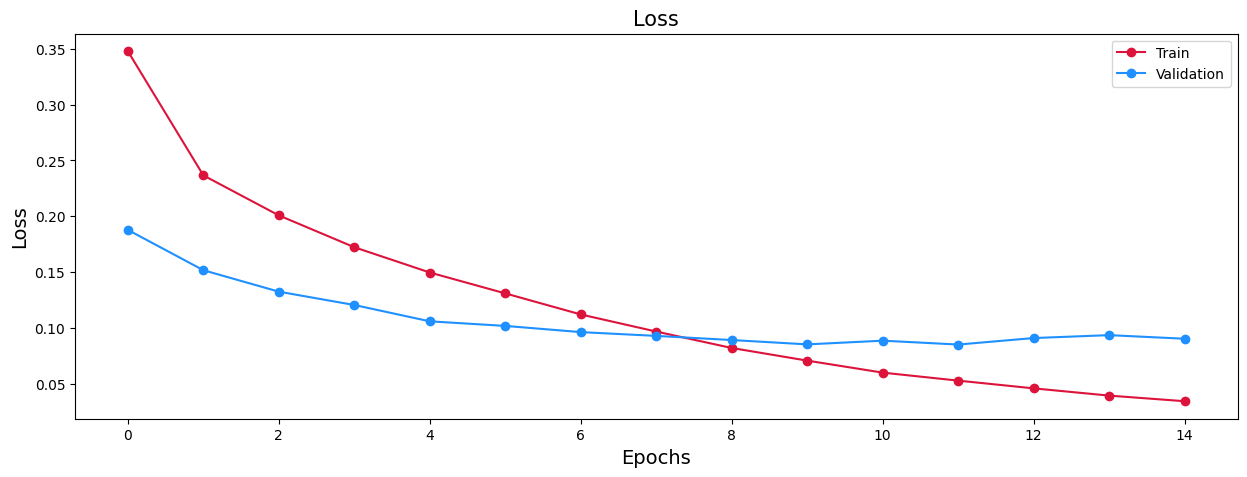

CPU times: user 22min 53s, sys: 6min 18s, total: 29min 11s
Wall time: 1h 4min 25s


In [ ]:
%%time
from helper import plot_training_history
# Model training and saving code remains the same
model = VLSP2018CNN(PRETRAINED_MODEL, ASPECT_CATEGORY_NAMES, optimizer, name=MODEL_NAME)

history = model.fit(
    train_tf_dataset,
    validation_data=val_tf_dataset,
    callbacks=[early_stop_callback],
    epochs=EPOCHS,
    verbose=1
).history

model.save_weights(f'./weights/{MODEL_NAME}/{MODEL_NAME}', save_format='tf')
plot_training_history(history)


In [ ]:
from google.colab import drive # Move weights to Drive for faster downloading
drive.mount('/content/GoogleDrive', force_remount=True)
!zip -r ./weights/{MODEL_NAME}.zip ./weights/{MODEL_NAME}
!mv ./weights/{MODEL_NAME}.zip /content/GoogleDrive/My\ Drive

Mounted at /content/GoogleDrive
  adding: weights/Hotel-v1/ (stored 0%)
  adding: weights/Hotel-v1/checkpoint (deflated 37%)
  adding: weights/Hotel-v1/Hotel-v1.index (deflated 80%)
  adding: weights/Hotel-v1/Hotel-v1.data-00000-of-00001 (deflated 32%)


# Predict on the Test Data

In [ ]:
reloaded_model =  VLSP2018CNN(PRETRAINED_MODEL, ASPECT_CATEGORY_NAMES, optimizer, name=MODEL_NAME)
reloaded_model.load_weights(f'./weights/{MODEL_NAME}/{MODEL_NAME}') # Reload the Model

val_loss = reloaded_model.evaluate(val_tf_dataset, batch_size=BATCH_SIZE, verbose=1)
test_loss = reloaded_model.evaluate(test_tf_dataset, batch_size=BATCH_SIZE, verbose=1)

print('Validation Loss:', val_loss)
print('Test Loss:', test_loss)

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at vinai/phobert-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


24/24 [==============================] - 38s 408ms/step - loss: 0.0996
Validation Loss: 0.08503023535013199
Test Loss: 0.09960634261369705


In [ ]:
# Predict on the test set
y_pred = reloaded_model.acsa_predict(test_tf_dataset, BATCH_SIZE) # On test set

# Print the first example and its prediction
print('Example:', raw_datasets['test'][0]['Review'])
reloaded_model.print_acsa_pred(y_pred[0])

24/24 [==============================] - 47s 418ms/step
Example: Ga giường không sạch, nhân viên quên dọn phòng một ngày.
=> ROOMS#CLEANLINESS,negative
=> SERVICE#GENERAL,negative


In [ ]:
from tensorflow.data import Dataset # On a random review by user
random_input = VLSP2018Loader.preprocess_and_tokenize(
    input('Enter your review: '), vn_preprocessor, tokenizer,
    batch_size=1, max_length=MAX_LENGTH
)
tf_inputs = Dataset.from_tensor_slices({x: [[random_input[x][0]]] for x in tokenizer.model_input_names})
random_pred = reloaded_model.acsa_predict(tf_inputs)
reloaded_model.print_acsa_pred(random_pred[0])

Enter your review: phòng sạch
[INFO] Preprocessing and tokenizing text data...


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


1/1 [==============================] - 8s 8s/step
=> ROOMS#CLEANLINESS,positive


# SkLearn Evaluation

In [ ]:
from helper import argmax_label_matrix
y_test = argmax_label_matrix(preprocessed_datasets['test']['FlattenOneHotLabels'])
y_test

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from evaluators.sklearn_evaluator import VLSP2018SklearnEvaluator
sk_eval = VLSP2018SklearnEvaluator(y_test, y_pred, ASPECT_CATEGORY_NAMES)
# sk_eval.report(report_type='Aspect#Category,Polarity').round(3)
# sk_eval.report(report_type='Aspect#Category').round(3)
# sk_eval.report(report_type='Polarity').round(3)
# sk_eval.report(report_type='macro_avg').round(3)
sk_eval.report(report_type='all')

100%|██████████| 37/37 [00:00<00:00, 53643.02it/s]


ACSA Report (w/o "None" polarity) 
 Aspect#Category 
 Aspect#Category,Polarity 
 
 
 precision recall f1-score support precision recall f1-score support 
 
 
 
 FACILITIES#CLEANLINESS,negative 
 1.000 0.000 0.000 5 
 1.000 0.000 0.000 3 
 
 
 
 FACILITIES#CLEANLINESS,positive 
 
 1.000 0.000 0.000 2 
 
 
 
 FACILITIES#COMFORT,negative 
 1.000 0.038 0.074 26 
 0.000 0.000 0.000 6 
 
 
 
 FACILITIES#COMFORT,positive 
 
 1.000 0.000 0.000 20 
 
 
 
 FACILITIES#DESIGN&FEATURES,negative 
 0.756 0.523 0.618 65 
 0.632 0.545 0.585 22 
 
 
 
 FACILITIES#DESIGN&FEATURES,positive 
 
 0.577 0.395 0.469 38 
 
 
 
 FACILITIES#DESIGN&FEATURES,neutral 
 
 1.000 0.000 0.000 5 
 
 
 
 FACILITIES#GENERAL,negative 
 0.500 0.381 0.432 21 
 1.000 0.000 0.000 1 
 
 
 
 FACILITIES#GENERAL,positive 
 
 0.375 0.316 0.343 19 
 
 
 
 FACILITIES#GENERAL,neutral 
 
 1.000 0.000 0.000 1 
 
 
 
 FACILITIES#MISCELLANEOUS,negative 
 1.000 0.000 0.000 8 
 1.000 0.000 0.000 5 
 
 
 
 FACILITIES#MISCELLANEOUS,positive 
 
 1.000 0.000 0.000 3 
 
 
 
 FACILITIES#PRICES,negative 
 0.500 0.077 0.133 13 
 0.000 0.000 0.000 3 
 
 
 
 FACILITIES#PRICES,positive 
 
 1.000 0.125 0.222 8 
 
 
 
 FACILITIES#PRICES,neutral 
 
 1.000 0.000 0.000 2 
 
 
 
 FACILITIES#QUALITY,negative 
 0.889 0.471 0.615 51 
 0.700 0.560 0.622 25 
 
 
 
 FACILITIES#QUALITY,positive 
 
 0.714 0.208 0.323 24 
 
 
 
 FACILITIES#QUALITY,neutral 
 
 1.000 0.000 0.000 2 
 
 
 
 FOOD&DRINKS#MISCELLANEOUS,negative 
 1.000 0.000 0.000 3 
 1.000 0.000 0.000 2 
 
 
 
 FOOD&DRINKS#MISCELLANEOUS,positive 
 
 1.000 0.000 0.000 1 
 
 
 
 FOOD&DRINKS#PRICES,negative 
 0.000 0.000 0.000 9 
 0.000 0.000 0.000 3 
 
 
 
 FOOD&DRINKS#PRICES,positive 
 
 1.000 0.000 0.000 6 
 
 
 
 FOOD&DRINKS#QUALITY,negative 
 0.924 0.853 0.887 129 
 0.909 0.526 0.667 19 
 
 
 
 FOOD&DRINKS#QUALITY,positive 
 
 0.875 0.948 0.910 96 
 
 
 
 FOOD&DRINKS#QUALITY,neutral 
 
 0.250 0.071 0.111 14 
 
 
 
 FOOD&DRINKS#STYLE&OPTIONS,negative 
 0.853 0.887 0.870 124 
 0.786 0.880 0.830 75 
 
 
 
 FOOD&DRINKS#STYLE&OPTIONS,positive 
 
 0.800 0.837 0.818 43 
 
 
 
 FOOD&DRINKS#STYLE&OPTIONS,neutral 
 
 1.000 0.000 0.000 6 
 
 
 
 HOTEL#CLEANLINESS,negative 
 0.879 0.866 0.872 67 
 1.000 0.125 0.222 8 
 
 
 
 HOTEL#CLEANLINESS,positive 
 
 0.846 0.932 0.887 59 
 
 
 
 HOTEL#COMFORT,negative 
 0.698 0.638 0.667 94 
 0.250 0.077 0.118 13 
 
 
 
 HOTEL#COMFORT,positive 
 
 0.707 0.725 0.716 80 
 
 
 
 HOTEL#COMFORT,neutral 
 
 1.000 0.000 0.000 1 
 
 
 
 HOTEL#DESIGN&FEATURES,negative 
 0.812 0.812 0.812 85 
 0.000 0.000 0.000 8 
 
 
 
 HOTEL#DESIGN&FEATURES,positive 
 
 0.762 0.865 0.810 74 
 
 
 
 HOTEL#DESIGN&FEATURES,neutral 
 
 1.000 0.000 0.000 3 
 
 
 
 HOTEL#GENERAL,negative 
 0.795 0.821 0.808 151 
 0.500 0.250 0.333 12 
 
 
 
 HOTEL#GENERAL,positive 
 
 0.779 0.859 0.817 135 
 
 
 
 HOTEL#GENERAL,neutral 
 
 0.000 0.000 0.000 4 
 
 
 
 HOTEL#MISCELLANEOUS,negative 
 0.444 0.059 0.104 68 
 0.333 0.088 0.140 34 
 
 
 
 HOTEL#MISCELLANEOUS,positive 
 
 1.000 0.000 0.000 29 
 
 
 
 HOTEL#MISCELLANEOUS,neutral 
 
 1.000 0.000 0.000 5 
 
 
 
 HOTEL#PRICES,negative 
 0.747 0.831 0.787 71 
 0.286 0.333 0.308 6 
 
 
 
 HOTEL#PRICES,positive 
 
 0.750 0.857 0.800 63 
 
 
 
 HOTEL#PRICES,neutral 
 
 1.000 0.000 0.000 2 
 
 
 
 HOTEL#QUALITY,negative 
 0.500 0.231 0.316 13 
 0.000 0.000 0.000 5 
 
 
 
 HOTEL#QUALITY,positive 
 
 0.400 0.286 0.333 7 
 
 
 
 HOTEL#QUALITY,neutral 
 
 1.000 0.000 0.000 1 
 
 
 
 LOCATION#GENERAL,negative 
 0.963 0.937 0.950 221 
 0.706 0.750 0.727 16 
 
 
 
 LOCATION#GENERAL,positive 
 
 0.909 0.947 0.928 190 
 
 
 
 LOCATION#GENERAL,neutral 
 
 1.000 0.000 0.000 15 
 
 
 
 ROOMS#CLEANLINESS,negative 
 0.906 0.920 0.913 200 
 0.556 0.556 0.556 27 
 
 
 
 ROOMS#CLEANLINESS,positive 
 
 0.898 0.952 0.924 166 
 
 
 
 ROOMS#CLEANLINESS,neutral 
 
 1.000 0.000 0.000 7 
 
 
 
 ROOMS#COMFORT,negative 
 0.711 0.688 0.699 93 
 0.519 0.452 0.483 31 
 
 
 
 ROOMS#COMFORT,positive 
 
 0.714 0.750 0.732 60 
 
 
 
 ROOMS#COMFORT,

# VLSP Evaluation

In [ ]:
from processors.vlsp2018_processor import VLSP2018Parser
VLSP2018Parser.vlsp_save_as(f'./predictions/{MODEL_NAME}.txt', raw_datasets['test']['Review'], y_pred, ASPECT_CATEGORY_NAMES)
!java ../evaluators/SAEvaluate.java {TEST_PATH.replace('.csv', '.txt')} ./predictions/{MODEL_NAME}.txt